<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/Models_Sushrut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!git clone https://github.com/ksushrut/CoinClassifier.git

fatal: destination path 'CoinClassifier' already exists and is not an empty directory.


In [81]:
!wget https://raw.githubusercontent.com/ksushrut/CoinClassifier/refs/heads/main/dataloader.py

--2025-04-10 14:20:56--  https://raw.githubusercontent.com/ksushrut/CoinClassifier/refs/heads/main/dataloader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2553 (2.5K) [text/plain]
Saving to: ‘dataloader.py.4’

dataloader.py.4     100%[===================>]   2.49K  --.-KB/s    in 0s      

2025-04-10 14:20:56 (59.6 MB/s) - ‘dataloader.py.4’ saved [2553/2553]



In [82]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
from torchvision import transforms
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from dataloader import load_coin_dataset

In [83]:
csv_loc='https://raw.githubusercontent.com/ksushrut/CoinClassifier/refs/heads/main/processed_data.csv'

In [84]:
drive.mount('/content/drive')
df=pd.read_csv(csv_loc)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,URL,image name,country,width,height,label
0,/content/drive/My Drive/CoinImages/Preprocesse...,14t.jpg,Australia,224,224,AUD 50 Cents
1,/content/drive/My Drive/CoinImages/Preprocesse...,10t.jpg,Australia,224,224,AUD 50 Cents
2,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpg,Australia,224,224,AUD 50 Cents
3,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpg,Australia,224,224,AUD 50 Cents
4,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,Australia,224,224,AUD 50 Cents
...,...,...,...,...,...,...
2418,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs
2419,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs
2420,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs
2421,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs


In [85]:
train_df, val_df, test_df, train_loader, val_loader, test_loader = load_coin_dataset(csv_loc)

                                                    URL image name  \
1048  /content/drive/My Drive/CoinImages/Preprocesse...   18h.jpeg   
951   /content/drive/My Drive/CoinImages/Preprocesse...   21h.jpeg   
2028  /content/drive/My Drive/CoinImages/Preprocesse...   11h.jpeg   
2099  /content/drive/My Drive/CoinImages/Preprocesse...   13t.jpeg   
1162  /content/drive/My Drive/CoinImages/Preprocesse...    19h.jpg   
...                                                 ...        ...   
771   /content/drive/My Drive/CoinImages/Preprocesse...     8t.jpg   
503   /content/drive/My Drive/CoinImages/Preprocesse...   23t.jpeg   
1224  /content/drive/My Drive/CoinImages/Preprocesse...    20t.jpg   
1721  /content/drive/My Drive/CoinImages/Preprocesse...   24t.jpeg   
965   /content/drive/My Drive/CoinImages/Preprocesse...     5t.jpg   

             country  width  height           label  encoded_class  
1048     New Zealand    224     224     NZ Dollar 1             40  
951      New Zealand 

In [86]:
train_df

,URL,image name,country,width,height,label,encoded_class
1048,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,New Zealand,224,224,NZ Dollar 1,40
951,/content/drive/My Drive/CoinImages/Preprocesse...,21h.jpeg,New Zealand,224,224,NZ 20 c,38
2028,/content/drive/My Drive/CoinImages/Preprocesse...,11h.jpeg,United States,224,224,USD 1$,42
2099,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpeg,United States,224,224,USD 50¢,46
1162,/content/drive/My Drive/CoinImages/Preprocesse...,19h.jpg,United Kingdom,224,224,GBP 10 Pence,26
...,...,...,...,...,...,...,...
771,/content/drive/My Drive/CoinImages/Preprocesse...,8t.jpg,Nepal,224,224,5 Nepali Rupee,12
503,/content/drive/My Drive/CoinImages/Preprocesse...,23t.jpeg,Japan,224,224,100 Yen,7
1224,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpg,United Kingdom,224,224,GBP 2 Pence,27
1721,/content/drive/My Drive/CoinImages/Preprocesse...,24t.jpeg,Canada,224,224,25 cents,11


In [87]:
val_df

,URL,image name,country,width,height,label,encoded_class
166,/content/drive/My Drive/CoinImages/Preprocesse...,12h.jpg,Australia,224,224,AUD 10 Cents,19
2252,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,India,224,224,INR 1Re,33
1556,/content/drive/My Drive/CoinImages/Preprocesse...,20h.jpeg,Canada,224,224,1 cent,3
1805,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,Canada,224,224,1 dollar,4
958,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,New Zealand,224,224,NZ 10 c,37
...,...,...,...,...,...,...,...
961,/content/drive/My Drive/CoinImages/Preprocesse...,3t.jpg,New Zealand,224,224,NZ 10 c,37
1755,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,Canada,224,224,5 cents,14
152,/content/drive/My Drive/CoinImages/Preprocesse...,1t.jpg,Australia,224,224,AUD 1 Dollar,18
750,/content/drive/My Drive/CoinImages/Preprocesse...,22t.jpeg,Nepal,224,224,1 Nepali Paisa,0


In [88]:
test_df

,URL,image name,country,width,height,label,encoded_class
799,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpeg,Nepal,224,224,5 Nepali Rupee,12
1551,/content/drive/My Drive/CoinImages/Preprocesse...,15h.jpeg,Canada,224,224,1 cent,3
1878,/content/drive/My Drive/CoinImages/Preprocesse...,22h.jpg,United States,224,224,USD 10¢,43
156,/content/drive/My Drive/CoinImages/Preprocesse...,6h.jpg,Australia,224,224,AUD 10 Cents,19
1161,/content/drive/My Drive/CoinImages/Preprocesse...,5h.jpg,United Kingdom,224,224,GBP 10 Pence,26
...,...,...,...,...,...,...,...
1004,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpg,New Zealand,224,224,NZ 10 c,37
1885,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpeg,United States,224,224,USD 10¢,43
489,/content/drive/My Drive/CoinImages/Preprocesse...,21h.jpeg,Japan,224,224,100 Yen,7
86,/content/drive/My Drive/CoinImages/Preprocesse...,24t.jpg,Australia,224,224,AUD 2 Dollar,20


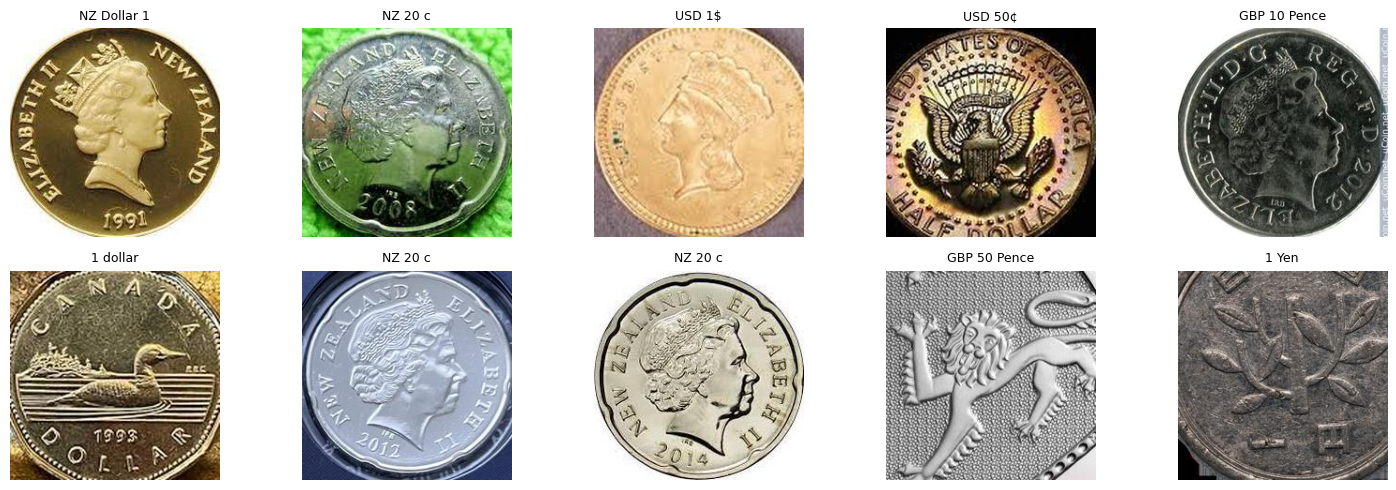

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def show_images_from_df(df, n=10):
    subset = df.iloc[:n]

    plt.figure(figsize=(15, 5))
    for idx, row in enumerate(subset.itertuples()):
        img_path = getattr(row, 'URL')
        label = getattr(row, 'label')
        try:
            img = Image.open(img_path+'/'+row[2])

            plt.subplot(2, 5, idx + 1)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')

        except Exception as e:
            print(f"Error opening {img_path}: {e}")

    plt.tight_layout()
    plt.show()

# Example usage:
show_images_from_df(train_df)

In [90]:
class AlexNetClassifier(nn.Module):
    def __init__(self, num_classes):
        super(AlexNetClassifier, self).__init__()
        # Load the pretrained AlexNet model
        self.alexnet = models.alexnet(pretrained=True)

        # Replace the last fully connected layer to match the number of classes in your dataset
        self.alexnet.classifier[6] = nn.Linear(self.alexnet.classifier[6].in_features, num_classes)

    def forward(self, x):
        # Forward pass through the AlexNet model
        return self.alexnet(x)

In [91]:
num_classes = 48  # Example: 10 classes for your dataset

# Instantiate the AlexNet model
model = AlexNetClassifier(num_classes=num_classes)

# Print the model to see the architecture
print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNetClassifier(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=Fals

In [92]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Step 9: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Step 10: Training Loop
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Optimize the model
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save the model after training
torch.save(model.state_dict(), 'alexnet_model.pth')
print("Model saved as 'alexnet_model.pth'")


/content/drive/My Drive/CoinImages/PreprocessedCoinImages/United Kingdom/GBP 10 Pence/13h.jpg
/content/drive/My Drive/CoinImages/PreprocessedCoinImages/Japan/100 Yen/22t.jpeg
/content/drive/My Drive/CoinImages/PreprocessedCoinImages/Japan/500 Yen/7t.jpeg


KeyboardInterrupt: 

In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during validation
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

# Step 12: Test Loop (Optional)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during testing
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

## VCG

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class PretrainedVGG16(nn.Module):
    def __init__(self, num_classes, freeze_features=True):
        super(PretrainedVGG16, self).__init__()

        # Load pretrained VGG16
        self.vgg = models.vgg16(pretrained=True)

        # Optionally freeze feature extractor
        if freeze_features:
            for param in self.vgg.features.parameters():
                param.requires_grad = False

        # Replace classifier with a new one
        self.vgg.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.vgg(x)

In [ ]:
model = PretrainedVGG16(num_classes=num_classes, freeze_features=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 136MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Step 10: Training Loop
num_epochs = 5  # Number of epochs (you can adjust it)

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print stats after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch 1/5, Loss: 2.5825, Accuracy: 26.13%
Epoch 2/5, Loss: 1.1403, Accuracy: 70.89%
Epoch 3/5, Loss: 0.5227, Accuracy: 85.38%
Epoch 4/5, Loss: 0.3790, Accuracy: 89.39%
Epoch 5/5, Loss: 0.2307, Accuracy: 93.14%


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during validation
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

# Step 12: Test Loop (Optional)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during testing
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 81.96%
Test Accuracy: 85.19%


In [ ]:
imgpath='/content/drive/My Drive/test.jpeg'
image = Image.open(imgpath).convert('RGB')  # Ensure 3 channels
input_tensor = transform(image).unsqueeze(0)

In [ ]:
model.eval()  # Set model to evaluation mode
input_tensor = input_tensor.to(device)

with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    predicted_class = predicted.item()

In [ ]:
print("Predicted class index:", predicted_class)

Predicted class index: 15


In [ ]:
print(df[df['encoded_class']==15])

                                                   URL image name  \
200  /content/drive/My Drive/CoinImages/Latest_Four...    14t.jpg   
201  /content/drive/My Drive/CoinImages/Latest_Four...     8h.jpg   
202  /content/drive/My Drive/CoinImages/Latest_Four...    20t.jpg   
203  /content/drive/My Drive/CoinImages/Latest_Four...    10t.jpg   
204  /content/drive/My Drive/CoinImages/Latest_Four...     5t.jpg   
205  /content/drive/My Drive/CoinImages/Latest_Four...     4t.jpg   
206  /content/drive/My Drive/CoinImages/Latest_Four...     3t.jpg   
207  /content/drive/My Drive/CoinImages/Latest_Four...     2t.jpg   
208  /content/drive/My Drive/CoinImages/Latest_Four...     7t.jpg   
209  /content/drive/My Drive/CoinImages/Latest_Four...     9t.jpg   
210  /content/drive/My Drive/CoinImages/Latest_Four...     2h.jpg   
211  /content/drive/My Drive/CoinImages/Latest_Four...     3h.jpg   
212  /content/drive/My Drive/CoinImages/Latest_Four...    13h.jpg   
213  /content/drive/My Drive/CoinI

In [ ]:
from CoinImages